In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Seoul = pd.read_csv('C:/Users/user/Desktop/서울/서울데이터_정제.csv', encoding='cp949')
Seoul

,gid,심야약국,응급실,심_응,약국,소방서,경찰서,안전상비,버스정류소,지하철,어린이집,유아인구수,총인구수
0,다사6453,0,0,0,2,0,0,3,5,0,3,411,9295
1,다사5651,0,0,0,5,0,1,31,26,4,4,205,12478
2,다사6157,0,0,0,11,0,0,16,40,4,23,1052,29822
3,다사5858,0,1,1,15,0,0,20,38,1,6,388,23787
4,다사5347,0,0,0,1,0,1,3,5,2,9,590,11880
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,다사4549,0,0,0,2,0,0,5,15,1,6,359,12768
600,다사5142,0,1,1,30,0,0,54,31,1,8,414,39634
601,다사5548,0,0,0,6,0,1,16,26,1,5,238,14329
602,다사5950,0,0,0,0,0,0,7,17,1,9,641,12767


In [3]:
Seoul1 = Seoul.drop(['심야약국', '응급실'], axis=1)

In [4]:
X = Seoul1.drop(['심_응'], axis=1) 
y = Seoul1['심_응']

In [5]:
y.value_counts()

0    513
1     91
Name: 심_응, dtype: int64

In [6]:
# 랜덤 추출
from sklearn.model_selection import train_test_split
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X, y, test_size=0.3, random_state=2) # random_state는 seed값

In [7]:
y_train_s.value_counts()

0    360
1     62
Name: 심_응, dtype: int64

In [8]:
y_test_s.value_counts()

0    153
1     29
Name: 심_응, dtype: int64

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)
    
# 평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}'.format(f1))

In [10]:
# Logistic Regression : 모든 변수
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
modeling(lr, X_train_s.iloc[:,1:], X_test_s.iloc[:,1:], y_train_s, y_test_s)

정확도 : 0.81, 정밀도 : 0.31, 재현율 : 0.14
f1-score : 0.19


In [11]:
# 모두 0이라고 했을 때 : 로지스틱이 정확도가 더 떨어짐
pred = np.zeros(182)
metrics(y_test_s, pred)

정확도 : 0.84, 정밀도 : 0.00, 재현율 : 0.00
f1-score : 0.00


In [12]:
# 층화 무작위 추출
from sklearn.model_selection import train_test_split
X_train_c,X_test_c,y_train_c,y_test_c = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)

# 상수항 추가
import statsmodels.api as sm
X_train_cc = sm.add_constant(X_train_c.iloc[:,1:])
X_test_cc = sm.add_constant(X_test_c.iloc[:,1:])

In [13]:
# Logistic Regression : 모든 변수
lr = LogisticRegression()
modeling(lr, X_train_cc, X_test_cc, y_train_c, y_test_c)

정확도 : 0.84, 정밀도 : 0.33, 재현율 : 0.11
f1-score : 0.17


In [14]:
model = sm.Logit(y_train_c, X_train_cc)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.338752
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    심_응   No. Observations:                  422
Model:                          Logit   Df Residuals:                      412
Method:                           MLE   Df Model:                            9
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.2040
Time:                        22:42:34   Log-Likelihood:                -142.95
converged:                       True   LL-Null:                       -179.59
Covariance Type:            nonrobust   LLR p-value:                 3.453e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3985      0.385     -8.839      0.000      -4.152      -2.645
약국             0.1007      0.030      3.306      0.001       0.041       0.160
소방서            1.0596      0.571      1.856      0.063      -0.059       2.178
경찰서           -0.1349      0.242     -0.559      0.576      -0.608       0.338
안전상비           0.0042      0.024      0.175      0.861      -0.043       0.051
버스정류소          0.0195      0.015      1.268      0.205      -0.011       0.050
지하철           -0.1328      0.172     -0.771      0.441      -0.470       0.205
어린이집           0.0587      0.042      1.382      0.167      -0.025       0.142
유아인구수         -0.0022      0.001     -2.338      0.019      -0.004      -0.000
총인구수        4.784e-05   3.53e-05      1.356      0.175   -2.13e-05       0.000
==============================================================================
"""

In [15]:
# Logistic Regression : 일부 변수
lr = LogisticRegression()
modeling(lr, X_train_cc.iloc[:,[0,1,2,8,9]], X_test_cc.iloc[:,[0,1,2,8,9]], y_train_c, y_test_c)

정확도 : 0.85, 정밀도 : 0.50, 재현율 : 0.11
f1-score : 0.18


In [16]:
model = sm.Logit(y_train_c, X_train_cc.iloc[:,[0,1,2,8,9]])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.343575
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    심_응   No. Observations:                  422
Model:                          Logit   Df Residuals:                      417
Method:                           MLE   Df Model:                            4
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.1927
Time:                        22:42:34   Log-Likelihood:                -144.99
converged:                       True   LL-Null:                       -179.59
Covariance Type:            nonrobust   LLR p-value:                 3.335e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2023      0.333     -9.613      0.000      -3.855      -2.549
약국             0.1006      0.020      5.076      0.000       0.062       0.139
소방서            1.2118      0.564      2.147      0.032       0.106       2.318
유아인구수         -0.0018      0.001     -2.326      0.020      -0.003      -0.000
총인구수        7.186e-05   2.88e-05      2.495      0.013    1.54e-05       0.000
==============================================================================
"""

In [17]:
# SMOTE (oversampling)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=200)
X_train_over,y_train_over = smote.fit_resample(X_train_cc, y_train_c)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train_cc.shape, y_train_c.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (422, 10) (422,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (716, 10) (716,)
SMOTE 적용 후 레이블 값 분포: 
 0    358
1    358
Name: 심_응, dtype: int64


In [18]:
# Logistic Regression : 모든 변수
lr = LogisticRegression()
modeling(lr, X_train_over, X_test_cc, y_train_over, y_test_c)

정확도 : 0.74, 정밀도 : 0.31, 재현율 : 0.63
f1-score : 0.41


In [19]:
model = sm.Logit(y_train_over, X_train_over)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.482774
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    심_응   No. Observations:                  716
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            9
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.3035
Time:                        22:42:34   Log-Likelihood:                -345.67
converged:                       True   LL-Null:                       -496.29
Covariance Type:            nonrobust   LLR p-value:                 1.414e-59
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8643      0.212     -8.784      0.000      -2.280      -1.448
약국             0.1773      0.024      7.365      0.000       0.130       0.225
소방서            0.0764      0.492      0.155      0.877      -0.889       1.041
경찰서           -0.6412      0.176     -3.635      0.000      -0.987      -0.295
안전상비           0.0264      0.018      1.488      0.137      -0.008       0.061
버스정류소          0.0320      0.011      2.853      0.004       0.010       0.054
지하철           -0.6545      0.126     -5.199      0.000      -0.901      -0.408
어린이집           0.0606      0.033      1.814      0.070      -0.005       0.126
유아인구수         -0.0023      0.001     -3.364      0.001      -0.004      -0.001
총인구수        9.793e-06   2.67e-05      0.367      0.714   -4.25e-05    6.21e-05
==============================================================================
"""

In [20]:
# 변수 선택
model = sm.Logit(y_train_over, X_train_over.iloc[:,[0,1,3,4,5,6,7,8,9]])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.482791
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    심_응   No. Observations:                  716
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            8
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.3035
Time:                        22:42:34   Log-Likelihood:                -345.68
converged:                       True   LL-Null:                       -496.29
Covariance Type:            nonrobust   LLR p-value:                 2.253e-60
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8614      0.211     -8.809      0.000      -2.276      -1.447
약국             0.1774      0.024      7.365      0.000       0.130       0.225
경찰서           -0.6422      0.176     -3.642      0.000      -0.988      -0.297
안전상비           0.0262      0.018      1.481      0.139      -0.008       0.061
버스정류소          0.0321      0.011      2.871      0.004       0.010       0.054
지하철           -0.6531      0.126     -5.203      0.000      -0.899      -0.407
어린이집           0.0611      0.033      1.835      0.067      -0.004       0.126
유아인구수         -0.0023      0.001     -3.380      0.001      -0.004      -0.001
총인구수        9.761e-06   2.67e-05      0.365      0.715   -4.26e-05    6.21e-05
==============================================================================
"""

In [21]:
model = sm.Logit(y_train_over, X_train_over.iloc[:,[0,1,3,4,5,6,7,8]])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.482884
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    심_응   No. Observations:                  716
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.3033
Time:                        22:42:34   Log-Likelihood:                -345.74
converged:                       True   LL-Null:                       -496.29
Covariance Type:            nonrobust   LLR p-value:                 3.528e-61
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8569      0.211     -8.807      0.000      -2.270      -1.444
약국             0.1776      0.024      7.371      0.000       0.130       0.225
경찰서           -0.6414      0.176     -3.635      0.000      -0.987      -0.296
안전상비           0.0294      0.015      1.907      0.056      -0.001       0.060
버스정류소          0.0324      0.011      2.907      0.004       0.011       0.054
지하철           -0.6598      0.124     -5.306      0.000      -0.904      -0.416
어린이집           0.0637      0.032      1.962      0.050       6e-05       0.127
유아인구수         -0.0021      0.001     -4.158      0.000      -0.003      -0.001
==============================================================================
"""

In [22]:
# Logistic Regression : 일부 변수
lr = LogisticRegression()
modeling(lr, X_train_over.iloc[:,[0,1,3,4,5,6,7,8]], X_test_cc.iloc[:,[0,1,3,4,5,6,7,8]], y_train_over, y_test_c)

정확도 : 0.79, 정밀도 : 0.37, 재현율 : 0.63
f1-score : 0.47


In [23]:
# LGBM Classifier
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
modeling(lgb, X_train_cc.iloc[:,1:], X_test_cc.iloc[:,1:], y_train_c, y_test_c)

정확도 : 0.86, 정밀도 : 0.58, 재현율 : 0.26
f1-score : 0.36


In [24]:
# LGBM Classifier
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
modeling(lgb, X_train_over.iloc[:,1:], X_test_cc.iloc[:,1:], y_train_over, y_test_c)

정확도 : 0.81, 정밀도 : 0.36, 재현율 : 0.33
f1-score : 0.35


In [25]:
# XGB Classifier
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
modeling(xgb, X_train_cc.iloc[:,1:], X_test_cc.iloc[:,1:], y_train_c, y_test_c)

정확도 : 0.86, 정밀도 : 0.57, 재현율 : 0.30
f1-score : 0.39


In [26]:
# XGB Classifier
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
modeling(xgb, X_train_over.iloc[:,1:], X_test_cc.iloc[:,1:], y_train_over, y_test_c)

정확도 : 0.82, 정밀도 : 0.39, 재현율 : 0.41
f1-score : 0.40


In [27]:
# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
modeling(knn ,X_train_cc.iloc[:,1:], X_test_cc.iloc[:,1:], y_train_c, y_test_c)

정확도 : 0.79, 정밀도 : 0.26, 재현율 : 0.22
f1-score : 0.24


In [28]:
# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
modeling(knn, X_train_over.iloc[:,1:], X_test_cc.iloc[:,1:], y_train_over, y_test_c)

정확도 : 0.64, 정밀도 : 0.20, 재현율 : 0.48
f1-score : 0.28


In [29]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
modeling(gaussian, X_train_cc.iloc[:,1:], X_test_cc.iloc[:,1:], y_train_c, y_test_c)

정확도 : 0.76, 정밀도 : 0.34, 재현율 : 0.63
f1-score : 0.44


In [30]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
modeling(gaussian, X_train_over.iloc[:,1:], X_test_cc.iloc[:,1:], y_train_over, y_test_c)

정확도 : 0.66, 정밀도 : 0.28, 재현율 : 0.78
f1-score : 0.41


In [31]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
modeling(decision, X_train_cc.iloc[:,1:], X_test_cc.iloc[:,1:], y_train_c, y_test_c)

정확도 : 0.80, 정밀도 : 0.32, 재현율 : 0.30
f1-score : 0.31


In [32]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
modeling(decision, X_train_over.iloc[:,1:], X_test_cc.iloc[:,1:], y_train_over, y_test_c)

정확도 : 0.82, 정밀도 : 0.41, 재현율 : 0.41
f1-score : 0.41


In [33]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=300)
modeling(random_forest, X_train_cc.iloc[:,1:], X_test_cc.iloc[:,1:], y_train_c, y_test_c)

정확도 : 0.85, 정밀도 : 0.50, 재현율 : 0.15
f1-score : 0.23


In [34]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=300)
modeling(random_forest, X_train_over.iloc[:,1:], X_test_cc.iloc[:,1:], y_train_over, y_test_c)

정확도 : 0.84, 정밀도 : 0.45, 재현율 : 0.52
f1-score : 0.48


Feature importances:
[0.259 0.004 0.031 0.138 0.139 0.042 0.102 0.124 0.161]
약국 : 0.259
소방서 : 0.004
경찰서 : 0.031
안전상비 : 0.138
버스정류소 : 0.139
지하철 : 0.042
어린이집 : 0.102
유아인구수 : 0.124
총인구수 : 0.161


<AxesSubplot:>

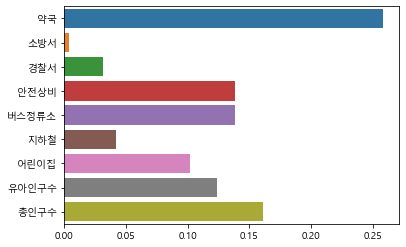

In [35]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(random_forest.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(X_train_over.keys()[1:], random_forest.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False    

# feature importance를 column별로 시각화 하기 
sns.barplot(x=random_forest.feature_importances_, y=X_train_over.keys()[1:])

In [36]:
pd.set_option('display.max_rows', 500)

Gyeonggi = pd.read_csv('C:/Users/user/Desktop/최종 프로젝트/경기데이터_정제.csv', encoding='cp949')

In [37]:
Gyeonggi1 = Gyeonggi.drop(['심야약국', '응급실'],axis=1)
Gyeonggi1

,gid,심_응,약국,소방서,경찰서,안전상비,버스정류소,지하철,어린이집,유아인구수,총인구수
0,다바4791,0,1,0,0,4,17,0,28,1143,13274
1,다사5375,0,0,0,0,0,0,0,0,0,21
2,다사2014,0,0,0,0,0,0,0,0,0,160
3,라사0375,0,0,0,0,0,0,0,0,0,0
4,다사5631,0,0,0,0,0,10,0,0,0,70
...,...,...,...,...,...,...,...,...,...,...,...
8628,다사8823,0,0,0,0,0,0,0,0,0,9
8629,다사5197,0,0,0,0,0,12,0,0,0,148
8630,다사6383,0,0,0,0,3,6,0,0,0,172
8631,다바6886,0,0,0,0,0,0,0,0,0,62


In [38]:
# Random Forest
classifier_rf = random_forest.fit(X_train_over.iloc[:,1:], y_train_over)
predictions = classifier_rf.predict_proba(Gyeonggi1.iloc[:,2:])
print(predictions)

[[0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]


In [39]:
pred_t = pd.DataFrame(predictions)
pred_t

,0,1
0,0.97,0.03
1,1.00,0.00
2,1.00,0.00
3,1.00,0.00
4,0.98,0.02
...,...,...
8628,1.00,0.00
8629,0.99,0.01
8630,1.00,0.00
8631,1.00,0.00


In [40]:
final = pd.concat([Gyeonggi1, pred_t], axis=1)
final

,gid,심_응,약국,소방서,경찰서,안전상비,버스정류소,지하철,어린이집,유아인구수,총인구수,0,1
0,다바4791,0,1,0,0,4,17,0,28,1143,13274,0.97,0.03
1,다사5375,0,0,0,0,0,0,0,0,0,21,1.00,0.00
2,다사2014,0,0,0,0,0,0,0,0,0,160,1.00,0.00
3,라사0375,0,0,0,0,0,0,0,0,0,0,1.00,0.00
4,다사5631,0,0,0,0,0,10,0,0,0,70,0.98,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8628,다사8823,0,0,0,0,0,0,0,0,0,9,1.00,0.00
8629,다사5197,0,0,0,0,0,12,0,0,0,148,0.99,0.01
8630,다사6383,0,0,0,0,3,6,0,0,0,172,1.00,0.00
8631,다바6886,0,0,0,0,0,0,0,0,0,62,1.00,0.00


In [41]:
final.to_csv('C:/Users/user/Desktop/경기_예측_전체.csv', encoding='cp949', index = False)